In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [65]:

dtypes = {
    "maker": str, 
    "model": str,
    "mileage": float, # kilo meters
    "manufacture_year": float,
    "engine_displacement": float,  #in ccm
    "engine_power": float, #in kW
    "body_type": str,  
    "color_slug": str, 
    "stk_year": str, # year of the last emission control
    "transmission": str, # automatic or manual
    "door_count": str,
    "seat_count": str,
    "fuel_type": str, # gasoline or diesel
    "date_created": str, # when the ad was scraped
    "date_last_seen": str, # when the ad was last seen
    "price_eur": float} # price in euros

df = pd.read_csv("cars_data_original.csv", dtype=dtypes)
print(f"Raw data has {df.shape[0]} rows, and {df.shape[1]} columns")
df.head()


Raw data has 3552912 rows, and 16 columns


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [66]:
#body_type, color_slug and stk_year - no proper values and not considering for analysis
#Date created and date last seen - derived new variable to calculate the time taken to sell a car

In [67]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.19033e+06,3.18233e+06,2.8095e+06,2.99804e+06,3.55291e+06
mean,115814,2000.87,2043.96,98.468,1.62581e+06
std,342251,81.7259,1973.96,49.0731,2.02562e+09
min,0,0,0,1,0.04
25%,18800,2004,1400,68,1295.34
50%,86415,2009,1798,86,7364.91
75%,158025,2013,1997,110,16284.2
max,1e+07,2017,32767,2237,2.70615e+12


In [68]:
#Dropping unwated columns 
print(df.isna().sum())

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64


In [69]:
from datetime import datetime

df["date_created_time"] = pd.to_datetime(df["date_created"])
df["date_last_seen_time"] = pd.to_datetime(df["date_last_seen"])

In [70]:
df["sales_duration"] = (df["date_last_seen_time"] - df["date_created_time"]).dt.days

In [71]:
df.head(3)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur,date_created_time,date_last_seen_time,sales_duration
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75,2015-11-14 18:10:06.838319+00:00,2016-01-27 20:40:15.463610+00:00,74
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31,2015-11-14 18:10:06.853411+00:00,2016-01-27 20:40:15.463610+00:00,74
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06,2015-11-14 18:10:06.861792+00:00,2016-01-27 20:40:15.463610+00:00,74


In [72]:
df.drop(["body_type","color_slug","stk_year","date_created","date_last_seen","date_created_time","date_last_seen_time","seat_count"], axis=1, inplace=True)

In [73]:
df.dropna(subset = ["model","maker"], inplace=True)

In [74]:
print("after cleaning maker and model : ")
df.isna().sum()

after cleaning maker and model : 


maker                        0
model                        0
mileage                 235242
manufacture_year        241910
engine_displacement     454854
engine_power            325709
transmission            495397
door_count              478163
fuel_type              1434047
price_eur                    0
sales_duration               0
dtype: int64

In [91]:
#Fuel type cleaning

fuel_type_mode = df.loc[df["fuel_type"].notna()].groupby(["maker","model"])["fuel_type"].agg(lambda x:x.value_counts().index[0]).\
rename("mode_fuel_type").reset_index()
print("fuel type mode table : ",fuel_type_mode)
df = df.merge(fuel_type_mode, how="left", on=["maker","model"])
df["fuel_type"] = df["fuel_type"].fillna(df["mode_fuel_type"]) # fill nan values with the mode of fuel_type
df.drop(["mode_fuel_type"], axis=1, inplace=True)
print("\nafter dropping the fuel type : \n\n")
print(df.isna().sum())


fuel type mode table :            maker model mode_fuel_type
0    alfa-romeo   145       gasoline
1    alfa-romeo   146       gasoline
2    alfa-romeo   147       gasoline
3    alfa-romeo   155       electric
4    alfa-romeo   156         diesel
..          ...   ...            ...
944       volvo   v70         diesel
945       volvo   v90         diesel
946       volvo  xc60         diesel
947       volvo  xc70         diesel
948       volvo  xc90         diesel

[949 rows x 3 columns]

after dropping the fuel type : 


maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
transmission           0
door_count             0
fuel_type              0
price_eur              0
sales_duration         0
dtype: int64


In [76]:
#mileage cleaning

df_mileage_group = df.groupby(["manufacture_year"])["mileage"].mean().round().rename("avg_mileage")
df = df.merge(df_mileage_group, how="left", on=["manufacture_year"])
df["mileage"] = df["mileage"].fillna(df["avg_mileage"])
df.drop(["avg_mileage"], axis=1, inplace=True)
print("\nafter cleaning mileage : \n\n")
print(df.isna().sum())

after cleaning mileage maker                       0
model                       0
mileage                 66534
manufacture_year       241910
engine_displacement    454854
engine_power           325709
transmission           495397
door_count             478163
fuel_type                 563
price_eur                   0
sales_duration              0
dtype: int64


In [77]:
df.dropna(subset = ["fuel_type","mileage"], inplace=True)

In [78]:
# Manufacture Year

min_year = 1885 # minimum threshold of the year. Lower values will be replaced with the average of manufacture_year
avg_year = df.loc[df['manufacture_year'] >= 1885].manufacture_year.mean()
df.loc[df.manufacture_year < 1885,"manufacture_year"] = avg_year
df.dropna(subset = ["manufacture_year"],inplace=True)


# engine_displacement 

min_displacement = 600 # minimum threshold of the year. Lower values will be replaced with the average of manufacture_year
df.loc[df.engine_displacement < 600 ,"engine_displacement"] = min_displacement
avg_displacement = df.engine_displacement.mean()
df.engine_displacement.fillna(avg_displacement,inplace=True)


# engine_power 

avg_engine_power = df.engine_power.mean()
df.engine_power.fillna(avg_engine_power,inplace=True)
df.isna().sum()

#price

df = df.drop(df[(df.price_eur < 2184) & (df.price_eur > 100000)].index)
df = df.drop(df[df.door_count == "None"].index)

#Drop na rows of door count and transmission 
df.dropna(subset = ["door_count","transmission"], inplace=True)

print("\nafter cleaning : \n",df.isna().sum())


after cleaning maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
transmission           0
door_count             0
fuel_type              0
price_eur              0
sales_duration         0
dtype: int64


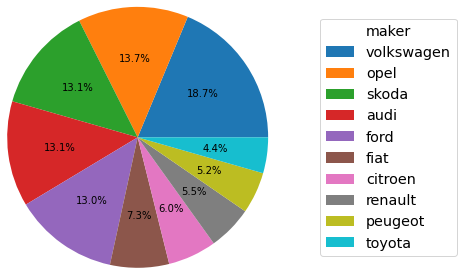

In [79]:
#Most frequently sold car brands.

count = df.groupby('maker').model.count().reset_index(name='count').sort_values(['count'], ascending=False)[:10]
maker_count = df.groupby('maker').model.count().sort_values(ascending=False)[:10].plot.pie(autopct='%1.1f%%', shadow=False,legend=True, fontsize=10,labels=None,ylabel='',radius=1.5)
plt.legend(count['maker'],loc="right",fontsize="x-large",title="maker",title_fontsize="x-large",bbox_to_anchor=(2, 0.5), ncol=1)


Average Price in euros :  12734


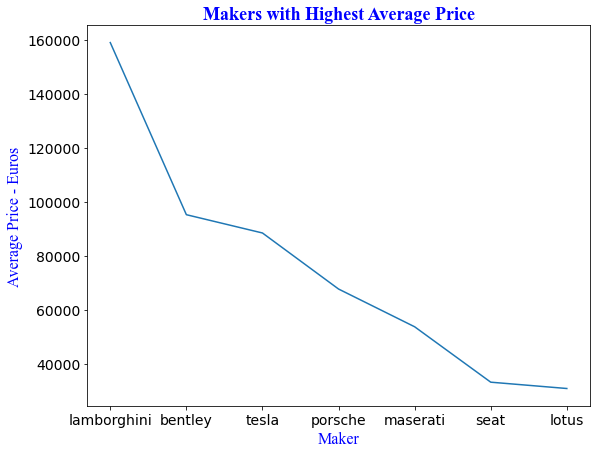

In [80]:
#Makers with Highest Average Price

print("Average Price in euros : ",round(df['price_eur'].mean()))

topmakers = df.groupby('maker')['price_eur'].mean().sort_values(ascending=False).head(7);
ax = topmakers.plot(figsize=(9,7))
ax.set_title("Makers with Highest Average Price",fontname="Times New Roman", size=18,fontweight="bold").set_color('blue')
ax.set_xlabel("Maker",fontsize=16,fontname="Times New Roman").set_color('blue')
ax.set_ylabel("Average Price - Euros",fontsize=16,fontname="Times New Roman").set_color('blue')
ax.tick_params(labelsize=14)


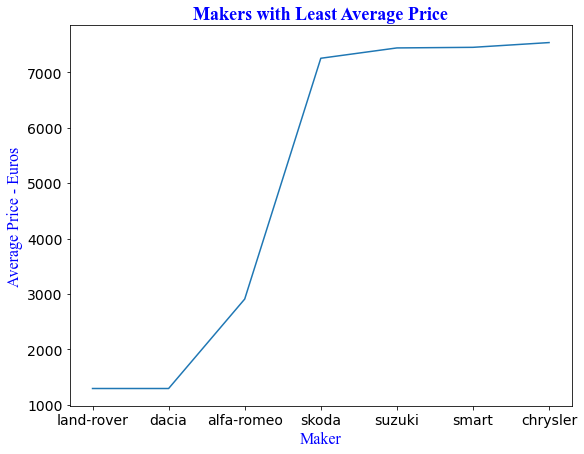

In [81]:
#Makers with Highest Average Price

leastmakers = df.groupby('maker')['price_eur'].mean().sort_values(ascending=True).head(7);

ax = leastmakers.plot(figsize=(9,7))
ax.set_title("Makers with Least Average Price",fontname="Times New Roman", size=18,fontweight="bold").set_color('blue')
ax.set_xlabel("Maker",fontsize=16,fontname="Times New Roman").set_color('blue')
ax.set_ylabel("Average Price - Euros",fontsize=16,fontname="Times New Roman").set_color('blue')
ax.tick_params(labelsize=14)


In [82]:
#Sales Duration and Average Price for targeted makers

df_maker =  df.loc[df["maker"].isin(["volkswagen","opel","skoda","audi","ford"])]
pd.pivot_table(df_maker,index=['maker'],values=["price_eur","sales_duration"],aggfunc={"price_eur":np.mean,"sales_duration":np.mean}). \
reset_index().rename(columns={'price_eur': 'average_price-euros', 'sales_duration': 'average_sale_duration -days'}).round()


,maker,average_price-euros,average_sale_duration -days
0,audi,21442.0,87.0
1,ford,9406.0,85.0
2,opel,8519.0,88.0
3,skoda,7250.0,63.0
4,volkswagen,12452.0,114.0


  fuel_type   count
1  gasoline  816028
0    diesel  649010

Fuel Type Distribution in the Dataset - Number of Cars by Fuel type


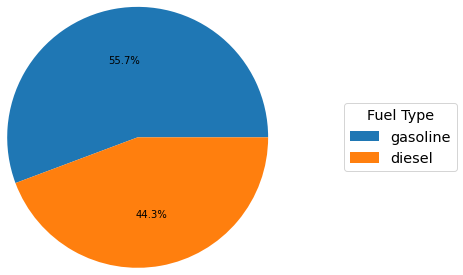

In [105]:
#Fuel Type Distribution 

count = df.loc[df['fuel_type'].isin(["gasoline","diesel"])].groupby('fuel_type').model.count().reset_index(name='count').sort_values(['count'], ascending=False)[:6]
maker_count = df.loc[df['fuel_type'].isin(["gasoline","diesel"])].groupby('fuel_type').model.count().sort_values(ascending=False)[:6].plot.pie(autopct='%1.1f%%', shadow=False,legend=True, fontsize=10,labels=None,ylabel='',radius=1.5)

print(count)
print("\nFuel Type Distribution in the Dataset - Number of Cars by Fuel type")
plt.legend(count['fuel_type'],loc="right",fontsize="x-large",title="Fuel Type",title_fontsize="x-large",bbox_to_anchor=(2, 0.5), ncol=1)


Text(0.5, 1.0, 'Average Price By Fuel Type')

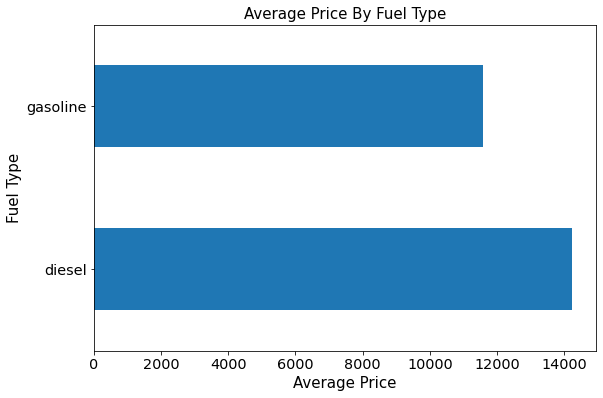

In [99]:
#Average Price By Fuel Type

Fuel_type_price = df.loc[df['fuel_type'].isin(["gasoline","diesel"])].groupby('fuel_type')['price_eur'].mean().sort_values(ascending=False);
Fuel_type_price.plot(kind='barh',fontsize="x-large",figsize=(9,6))
#plt.legend(loc='best', fontsize=15,bbox_to_anchor=(1, 1))
plt.xlabel("Average Price",fontsize=15)
plt.ylabel("Fuel Type",fontsize=15)
plt.title("Average Price By Fuel Type",fontsize=15)


Average sale duration :  90


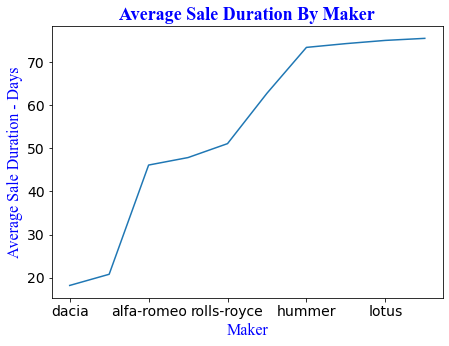

In [85]:
#Average Sale Duration By Maker

averagesale = df.groupby('maker')['sales_duration'].mean().sort_values(ascending=True).head(10);

ax = averagesale.plot(figsize=(7,5))
ax.set_title("Average Sale Duration By Maker",fontname="Times New Roman", size=18,fontweight="bold").set_color('blue')
ax.set_xlabel("Maker",fontsize=16,fontname="Times New Roman").set_color('blue')
ax.set_ylabel("Average Sale Duration - Days",fontsize=16,fontname="Times New Roman").set_color('blue')
ax.tick_params(labelsize=14)

df_maker =  df.loc[df["maker"].isin(["dacia","alfa-romeo","rolls-royce"])]
pd.pivot_table(df_maker,index=['maker'],values=["price_eur"],aggfunc={"price_eur":np.mean}). \
reset_index().rename(columns={'price_eur': 'average_price-euros'}).round()

print("Average sale duration : ",round(df['sales_duration'].mean()))


(0.0, 100.0, 0.0, 100.0)

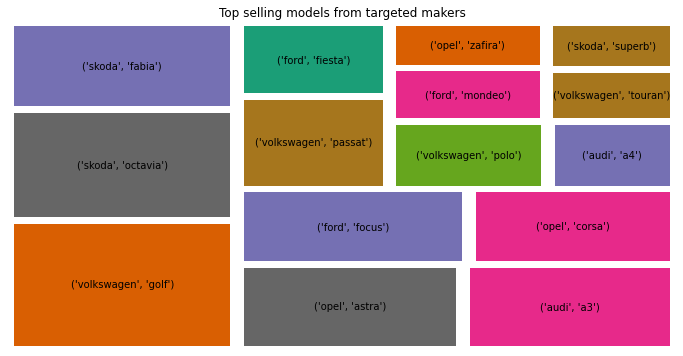

In [86]:
#Top selling models from targeted makers

import squarify
models_count = df[df["maker"].isin(["volkswagen","opel","skoda","audi","ford"])].groupby(['maker','model']).size().reset_index(name="counts").sort_values(['counts'],ascending=False).head(15)

sizes = models_count.counts.to_list()
np.random.seed(seed=123456)
color = plt.cm.Dark2(np.random.rand(len(sizes)))
label = list(zip(models_count.maker,models_count.model))

# treemap plot
plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes, 
              color=color, 
              label=label, 
              pad=True)
# labels
plt.title('Top selling models from targeted makers')
plt.axis('off')
